In [1]:
import sys
import math, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
#from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import linalg as LA
import numpy as np

In [2]:
def read_cov(covfile):
    data = np.genfromtxt(covfile)
    ndata = int(np.max(data[:,0]))+1

    print('ndata=%d'%(ndata))

    cov = np.zeros((ndata,ndata))
#     cor = np.zeros((ndata,ndata))
    for i in range(0,data.shape[0]):
            cov[int(data[i,0]),int(data[i,1])] =data[i,8] +data[i,9]
            cov[int(data[i,1]),int(data[i,0])] =data[i,8] +data[i,9]
    return cov, ndata

In [3]:
def test_cov(cov):
    a = np.sort(LA.eigvals(cov))
    print('eigenvalues: ', a[:])
    # print(np.linalg.cholesky(covcut))
    # print "min+max eigenvalues covcut:"
    #print b
    print('min, max eigenvalues: ', np.min(a), np.max(a))
    ind = np.where(a < 0)
    if (np.min(a) <0): 
        print('negative eigens: ', a[ind])
    else:
        print('Postive Definite!')

In [4]:
def inv_cov_output(cov, n, outfile):
    invcov = LA.inv(cov)
    narr = np.arange(n)
    col1 = np.repeat(narr, n)
    col2 = np.tile(narr, n)
    np.savetxt(outfile, np.c_[col1, col2, invcov.flatten()], fmt='%d %d %le')
    print('inv cov saved!')
    return invcov

In [5]:
def get_Nggl(ndata_6x2pt,nshear,nsource,nlens,ntheta):
    nggl = ndata_6x2pt / ntheta - nshear - nlens - nlens - nsource - 1
    return nggl

In [6]:
def plot_cov(cov, figsize):
    plt.figure(figsize=(figsize,figsize))
    plt.imshow(np.log10(abs(cov)))
    plt.show()

In [7]:
def plot_corr(cov, figsize):
    cmap = 'seismic'
    ndim = cov.shape[0]
    corr = np.zeros((ndim,ndim))
    for i in range(ndim):
        for j in range(ndim):
            corr[i][j] = cov[i][j]/np.sqrt(cov[i][i]*cov[j][j])
    fig = plt.figure(figsize=(figsize,figsize))
    im = plt.imshow(corr, cmap=cmap, vmin=-1,vmax=1)
    fig.colorbar(im, orientation='vertical')
    plt.tight_layout()
    plt.show()

In [8]:
def save_cov_npy(cov, npyname):
    np.save(npyname, cov)
    print("npy cov saved!")

In [9]:
nsource = 10
nshear = nsource*(nsource+1)/2
ntheta = 15
nlens = 10

In [10]:
cov_Y6_6x2pt, ndata_Y6_6x2pt = read_cov('cov_LSSTxSO_Y6_15')
nggl = get_Nggl(ndata_Y6_6x2pt,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)

ndata= 2070
nggl= 52


In [11]:
save_cov_npy(cov_Y6_6x2pt, 'cov_LSSTxSO_Y6_6x2pt.npy')

npy cov saved!


In [116]:
test_cov(cov_Y6_6x2pt)

eigenvalues:  [3.56256733e-24 3.60818173e-24 3.61325261e-24 ... 9.66336681e-11
 1.06395693e-10 1.14397702e-10]
min, max eigenvalues:  3.56256732957109e-24 1.1439770231106218e-10
Postive Definite!


In [120]:
invcov_Y6_6x2pt = inv_cov_output(cov_Y6_6x2pt, ndata_Y6_6x2pt, 'invcov_Y6_6x2pt')

inv cov saved!


array([[ 7.21930174e+18, -4.53552514e+16, -6.76767728e+16, ...,
        -5.85471671e+13, -3.05526603e+13, -5.88771375e+12],
       [-4.53552514e+16,  1.57599795e+19, -1.22089175e+17, ...,
        -1.53286743e+14, -9.75422047e+13, -2.16065846e+13],
       [-6.76767728e+16, -1.22089175e+17,  3.37123442e+19, ...,
        -3.09393252e+14, -2.12180630e+14, -4.85071391e+13],
       ...,
       [-5.85471671e+13, -1.53286743e+14, -3.09393253e+14, ...,
         1.45585420e+19,  3.23169640e+15,  9.22932294e+14],
       [-3.05526603e+13, -9.75422046e+13, -2.12180630e+14, ...,
         3.23169640e+15,  1.75027096e+19,  7.19685025e+14],
       [-5.88771373e+12, -2.16065845e+13, -4.85071392e+13, ...,
         9.22932294e+14,  7.19685025e+14,  8.43203263e+18]])

In [13]:
n3x2pt = ndata_Y6_6x2pt/ntheta-(nsource+nlens+1)
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y6_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y6_3x2pt.npy')
invcov_Y6_3x2pt = inv_cov_output(cov_Y6_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y6_3x2pt')

n3x2pt =  117
npy cov saved!


/Users/fx/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


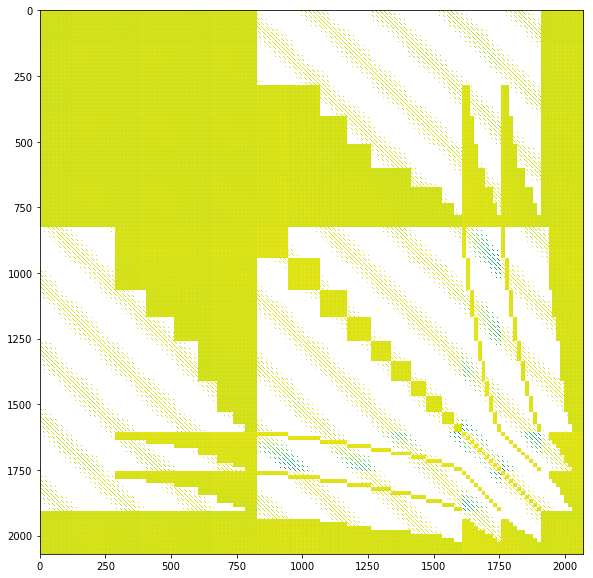

In [102]:
plot_cov(cov_Y6_6x2pt, 10)

ndata= 1965
npy cov saved!
nggl= 45
eigenvalues:  [2.10726665e-23 2.11028112e-23 2.12162459e-23 ... 1.66769805e-10
 1.94942305e-10 1.98728494e-10]
min, max eigenvalues:  2.1072666465827912e-23 1.9872849429649916e-10
Postive Definite!


/Users/fx/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


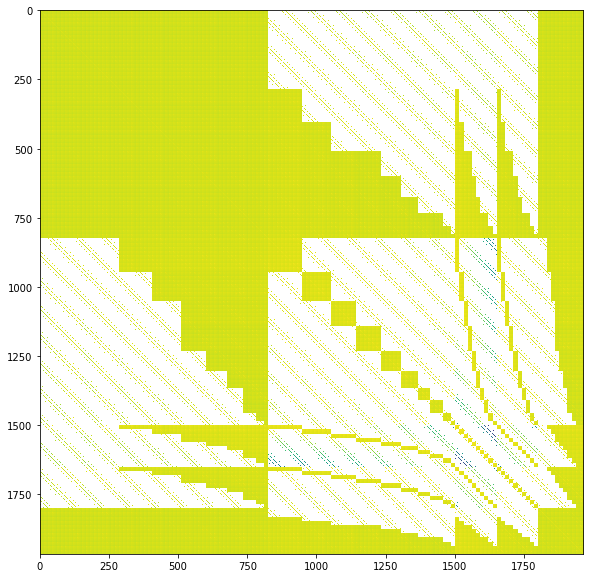

In [14]:
cov_Y1_6x2pt, ndata_Y1_6x2pt = read_cov('cov_LSSTxSO_Y1_15')
save_cov_npy(cov_Y1_6x2pt, 'cov_LSSTxSO_Y1_6x2pt.npy')
nggl = get_Nggl(ndata_Y1_6x2pt,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)
test_cov(cov_Y1_6x2pt)
plot_cov(cov_Y1_6x2pt, 10)

In [20]:
invcov_Y1_6x2pt = inv_cov_output(cov_Y1_6x2pt, ndata_Y1_6x2pt, 'invcov_Y1_6x2pt')

inv cov saved!


In [15]:
n3x2pt = ndata_Y1_6x2pt/ntheta-(nsource+nlens+1)
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y1_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y1_3x2pt.npy')
invcov_Y1_3x2pt = inv_cov_output(cov_Y1_6x2pt[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y1_3x2pt')

n3x2pt =  110
npy cov saved!


ndata=2010
npy cov saved!
nggl= 48.0
eigenvalues:  [2.10747108e-23 2.11028641e-23 2.12164638e-23 ... 2.02314653e-10
 2.89350299e-10 2.95444257e-10]
min, max eigenvalues:  2.1074710808733472e-23 2.954442574818341e-10
Postive Definite!


<ipython-input-7-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


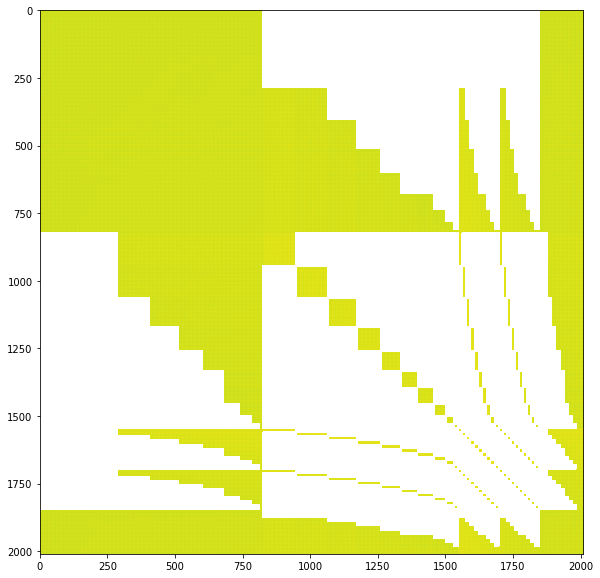

In [11]:
cov_Y1_6x2pt_1sample, ndata_Y1_6x2pt_1sample = read_cov('cov_LSSTxSO_Y1_1sample')
save_cov_npy(cov_Y1_6x2pt_1sample, 'cov_LSSTxSO_Y1_1sample_6x2pt.npy')
nggl = get_Nggl(ndata_Y1_6x2pt_1sample,nshear,nsource,nlens,ntheta)
print("nggl=", nggl)
test_cov(cov_Y1_6x2pt_1sample)
plot_cov(cov_Y1_6x2pt_1sample, 10)

In [12]:
invcov_Y1_6x2pt_1sample = inv_cov_output(cov_Y1_6x2pt_1sample, ndata_Y1_6x2pt_1sample, 'invcov_Y1_6x2pt_1sample')

inv cov saved!


In [17]:
n3x2pt = ndata_Y1_6x2pt_1sample/ntheta-(nsource+nlens+1)
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y1_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y1_1sample_3x2pt.npy')
invcov_Y1_3x2pt_1sample = inv_cov_output(cov_Y1_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y1_3x2pt_1sample')

n3x2pt =  113
npy cov saved!


ndata=2085
npy cov saved!
nggl= 53.0
eigenvalues:  [3.57372099e-24 3.60861820e-24 3.61427933e-24 ... 1.12998631e-10
 1.53427239e-10 1.69443384e-10]
min, max eigenvalues:  3.573720987200118e-24 1.6944338418469467e-10
Postive Definite!


<ipython-input-7-103adf963930>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(cov)))


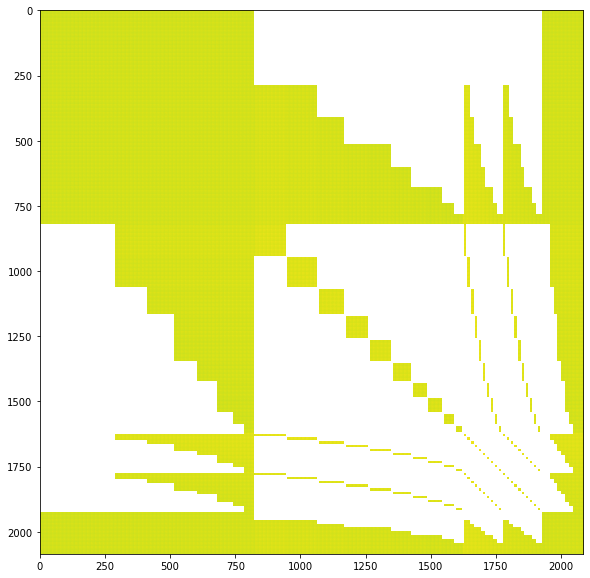

In [13]:
cov_Y6_6x2pt_1sample, ndata_Y6_6x2pt_1sample = read_cov('cov_LSSTxSO_Y6_1sample')
save_cov_npy(cov_Y6_6x2pt_1sample, 'cov_LSSTxSO_Y6_1sample_6x2pt.npy')
nggl = get_Nggl(ndata_Y6_6x2pt_1sample,nshear,nsource,nlens,ntheta)
print( "nggl=", nggl)
test_cov(cov_Y6_6x2pt_1sample)
plot_cov(cov_Y6_6x2pt_1sample, 10)

In [14]:
invcov_Y6_6x2pt_1sample = inv_cov_output(cov_Y6_6x2pt_1sample, ndata_Y6_6x2pt_1sample, 'invcov_Y6_6x2pt_1sample')

inv cov saved!


In [19]:
n3x2pt = ndata_Y6_6x2pt_1sample/ntheta-(nsource+nlens+1)
print('n3x2pt = ', n3x2pt)
save_cov_npy(cov_Y6_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], 'cov_LSSTxSO_Y6_1sample_3x2pt.npy')
invcov_Y6_3x2pt_1sample = inv_cov_output(cov_Y6_6x2pt_1sample[:n3x2pt*ntheta,:n3x2pt*ntheta], n3x2pt*ntheta, 'invcov_Y6_3x2pt_1sample')

n3x2pt =  118
npy cov saved!


In [76]:
cor = np.zeros((ndata,ndata))
for i in range(0,ndata):
	for j in range(0,ndata):
		cor[i,j] = cov[i,j]/math.sqrt(cov[i,i]*cov[j,j])

In [77]:
b = np.sort(LA.eigvals(cor))
print b[:]
print np.min(b), np.max(b)
ind = np.where(b < 0)
if (np.min(b) <0): 
	print b[ind]

[1.31077993e-03 1.34326211e-03 1.69305584e-03 ... 4.53976995e+01
 4.87886156e+01 5.90289368e+01]
0.0013107799320186326 59.02893679257713


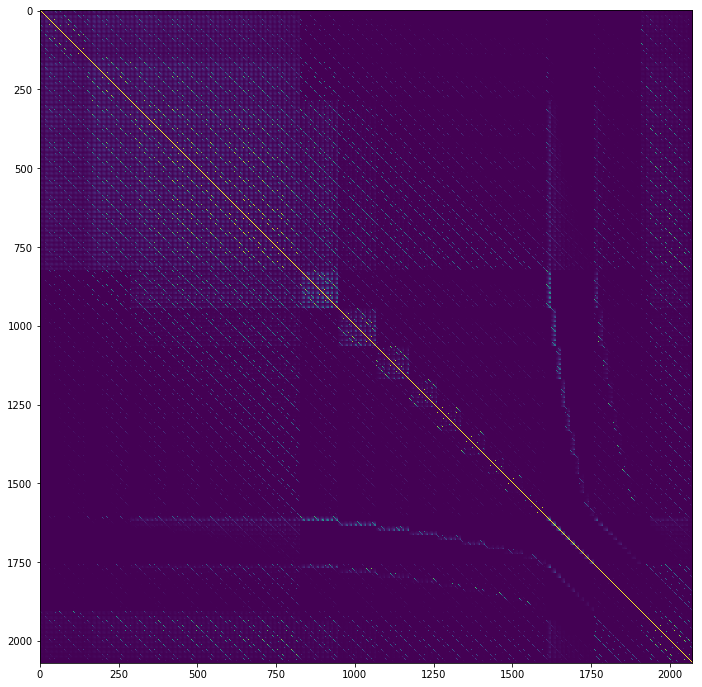

In [78]:
plt.figure(figsize=(12,12))
plt.imshow(cor)
plt.show()